# Project 3- CHURN prediction

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Import

1.  Extrel -All the donors of the organization
2. Payhistory: Paymenthistory of each donor 
3.  Communication: All possible communication between the donor and the organization
4.  Commaint: Description of the main topic code

In [2]:

df_extrel=pd.read_sas('churn/extrel.sas7bdat')


In [3]:
df_extrel.shape

(26689, 4)

In [4]:
df_extrel.dtypes

EXTRELNO              object
EXRELACTCD            object
EXTRELSTDT    datetime64[ns]
EXRELDATEN    datetime64[ns]
dtype: object

In [5]:
df_extrel.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,0026414,CT,1995-02-02,NaT
1,0026419,FP,1992-03-01,NaT
2,0026424,FP,1992-03-01,1996-12-24
3,0026430,FP,1992-03-01,2006-01-31
4,0026430,CT,1997-03-07,NaT


In [6]:
df_actv_cd=pd.read_sas('C:churn/extrelty.sas7bdat')

In [7]:
df_actv_cd.head()

,EXRELACTCD,EXRELACTDE
0,FP,CommitmentDo
1,PS,Prospect
2,PF,Prosp Fundra
3,PP,Prosp Promot
4,GR,Grantor


In [8]:
df_actv_cd['EXRELACTCD'].value_counts().head()

PM    1
PO    1
FR    1
GR    1
BM    1
Name: EXRELACTCD, dtype: int64

# A. DATA PREPARATION: 
---

## Setting Independent & dependent window to find active customers

***

- End of dependent window = 31 December 2006 
- Start of dependent window = 01 January 2006 
- End of independent window = 03 December 2005 

In [9]:
end_iw='2005-12-03'
st_dw='2006-01-01'

In [10]:
# creating mask to filter Data of  active customers ( as one with - activity code = FP, - start date before end of
#IW - end date after start of DW [means he was active during IW] or missing [means still a
#donor]

mask=(df_extrel['EXTRELSTDT']<end_iw ) & ((df_extrel['EXRELDATEN']>st_dw) |(df_extrel['EXRELDATEN'].isnull()))\
& (df_extrel['EXRELACTCD']=='FP') 


In [11]:
# base table- ACtive DONORS
df_basetable=df_extrel[mask]
df_basetable.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
1,0026419,FP,1992-03-01,NaT
3,0026430,FP,1992-03-01,2006-01-31
5,0026431,FP,1992-03-01,NaT
7,0026443,FP,1992-03-01,NaT
8,0026444,FP,1992-03-01,NaT


In [12]:
df_basetable.shape
df_basetable['startyr']=df_basetable['EXTRELSTDT'].apply(lambda x: x.year)

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


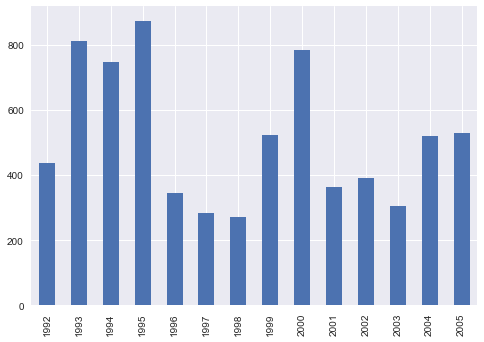

In [13]:
count=df_basetable['startyr'].value_counts()
count.sort_index().plot('bar')

In [14]:
df_basetable['Churn']=np.where(df_basetable['EXRELDATEN'].isnull(),0,1)

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
df_basetable['Churn'].value_counts()

0    6675
1     506
Name: Churn, dtype: int64

# This is the case of class imbalance. So we need to implement strategy accordingly.

---

In [16]:
# List of active donors
active_donor=df_basetable['EXTRELNO'].tolist()

In [17]:
df_comm=pd.read_sas('C:churn/communication.sas7bdat')

In [18]:
df_comm

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28
5,000767603,LE,TAX,ID,0000020,O,1995-02-24
6,000890300,CI,CTS,CT,0000020,O,1995-05-30
7,000921255,CI,CTS,CT,0000020,O,1995-07-03
8,000992863,CI,CTS,CT,0000020,O,1995-07-10
9,001047202,CI,CTS,CT,0000020,O,1995-08-19


In [19]:
df_comm.shape

(763569, 7)

In [20]:
# EXTRACTING Last communication Information- 
last_comm_info=df_comm.sort_values(ascending=0, by='CONTDATE').groupby('EXTRELNO').nth(0)

In [21]:
# Description of main topic of contact code
df_comm_tp_code=pd.read_sas('C:churn/commaint.sas7bdat')

In [22]:
df_comm_tp_code.head()

,MNTOPCODE,MNTOPDESC
0,CAN,Cancellations/replacements
1,DIS,Discontinuations
2,MKT,Marketing - Enquiries
3,GEN,General
4,NEW,New relations


In [23]:
df_comm_md_code=pd.read_sas('C:churn/commediu.sas7bdat')

In [24]:
df_comm_md_code.head()

,MEDIUMCODE,MEDIUMDESC
0,FF,Face to Face contact
1,FX,Fax
2,TX,Telex
3,EM,Electronic Mail
4,TE,Telephone call


In [25]:
df_comm_class=pd.read_sas('C:churn/comclas.sas7bdat')

In [26]:
df_comm_class

,CLASCODE,CLASDESC
0,CT,CTS-item
1,RI,Request for information
2,CM,Complaint
3,TA,Threath / Accusation
4,AK,Acknowledgement
5,RM,Reminder
6,ID,Information delivery
7,AN,Answer




---

## Generating predictors from Payment- table

In [27]:
df_pay=pd.read_sas('C:churn/payhistory.sas7bdat')

In [28]:
df_pay

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK
5,128703.0,1994-06-14,0.50,0000020,D,OK
6,151581.0,1994-07-05,0.50,0000020,D,OK
7,182688.0,1994-08-15,0.50,0000020,D,OK
8,210468.0,1994-09-23,0.50,0000020,D,OK
9,235968.0,1994-10-21,0.50,0000020,D,OK


In [30]:
# Finding total payment mad eby each donor
PAMT_total=pd.pivot_table(index=['EXTRELNO'],data=df_pay,values=['PAMT'],aggfunc=sum)
PAMT_total.columns=['Total_Pamt']
PAMT_total

,Total_Pamt
EXTRELNO,
0000019,9.57
0000020,3176.97
0000035,3168.40
0000042,1543.03
0000043,4373.24
0000060,1333.33
0000072,3111.06
0000081,9308.71
0000089,3153.47


In [31]:
# Finding most recent date of payment
Recent_date_pay=pd.DataFrame(df_pay.groupby('EXTRELNO').apply(lambda x: x['PDATE'].max()),columns=['recent_date'])


In [32]:
Recent_date_pay

,recent_date
EXTRELNO,
0000019,1993-12-31
0000020,2007-01-17
0000035,2007-01-17
0000042,2001-01-23
0000043,2003-07-14
0000060,1999-12-07
0000072,2006-11-10
0000081,2006-12-08
0000089,2007-01-17


In [33]:
# Frequency of paymenta
g=df_pay.groupby('EXTRELNO')
g.size()
frq=pd.DataFrame(g.size(),columns=['Frequency'])
frq

,Frequency
EXTRELNO,
0000019,1
0000020,158
0000035,155
0000042,85
0000043,229
0000060,76
0000072,59
0000081,171
0000089,157


# Getting information from communication table

In [34]:
# Communiation info on the last contact date
con_info_last=df_comm.sort_values(by='CONTDATE',ascending=False).groupby('EXTRELNO').nth(0)

In [35]:
con_info_last

,CLASCODE,CONTDATE,CONTDIREC,CONTID,MEDIUMCODE,MNTOPCODE
EXTRELNO,,,,,,
0000020,CT,2006-08-10,O,005075715,CI,CTS
0000035,CT,2006-10-03,O,005100553,CI,CTS
0000042,RI,2001-03-29,I,003271241,LE,DIS
0000043,ID,2004-01-23,O,004373421,LE,TAX
0000060,ID,2000-02-12,O,002782523,LE,TAX
0000072,CT,2006-10-05,O,005103306,CI,CTS
0000081,CT,2006-12-26,O,005155686,CI,CTS
0000089,CT,2006-10-31,O,005118172,CI,CTS
0000091,ID,2004-01-23,O,004373438,LE,TAX


In [36]:
# Merging Payment & Communication Information
df_f=pd.concat([PAMT_total,Recent_date_pay,frq,con_info_last],axis=1)
df_f.shape

(22919, 9)

In [37]:
df_basetable.shape

(7181, 6)

In [51]:
# Merging Active DONOR information with thier payment & communication information
df_ac_data=df_basetable.set_index('EXTRELNO').merge(df_f,left_index=True,right_index=True,how='left')

In [52]:
df_ac_data

,EXRELACTCD,EXTRELSTDT,EXRELDATEN,startyr,Churn,Total_Pamt,recent_date,Frequency,CLASCODE,CONTDATE,CONTDIREC,CONTID,MEDIUMCODE,MNTOPCODE
EXTRELNO,,,,,,,,,,,,,,
0026419,FP,1992-03-01,NaT,1992,0,3155.05,2007-01-02,69.0,CT,2006-07-19,O,005057036,CI,CTS
0026430,FP,1992-03-01,2006-01-31,1992,1,2786.13,2005-10-18,146.0,AK,2006-03-16,O,004978998,LE,DIS
0026431,FP,1992-03-01,NaT,1992,0,3050.61,2006-04-28,21.0,CT,2006-10-05,O,005103246,CI,CTS
0026443,FP,1992-03-01,NaT,1992,0,3109.62,2007-01-17,156.0,CT,2006-12-14,O,005150482,CI,CTS
0026444,FP,1992-03-01,NaT,1992,0,3092.47,2007-01-17,157.0,CT,2006-06-21,O,005034575,CI,CTS
0026446,FP,1992-03-01,NaT,1992,0,3667.54,2007-01-17,66.0,CT,2006-08-28,O,005083945,CI,CTS
0026447,FP,1992-03-01,NaT,1992,0,3110.13,2007-01-17,156.0,CT,2006-11-17,O,005130765,CI,CTS
0026470,FP,1992-03-01,NaT,1992,0,2949.13,2007-01-17,156.0,CT,2007-01-10,O,005165099,CI,CTS
0026472,FP,1992-03-01,NaT,1992,0,3073.64,2006-05-03,21.0,CT,2006-06-08,O,005026286,CI,CTS


In [53]:
df_ac_data.shape

(7181, 14)

In [54]:
# last day of the dump is 2/02/2007 : 
l=datetime.datetime(2007,02,02)

---

# List of columns with missing values

In [55]:
df_ac_data.columns[df_ac_data.isnull().any()]

Index([u'EXRELDATEN', u'Total_Pamt', u'recent_date', u'Frequency'], dtype='object')

## 1.  Imputing missing values in recent_date column with mode

In [56]:
md_churn_date=df_ac_data[df_ac_data['Churn']==1]['recent_date'].mode()[0]

In [57]:
md_nt_churn_date=df_ac_data[df_ac_data['Churn']==0]['recent_date'].mode()[0]

In [58]:
df_ac_data.loc[((df_ac_data['Churn']==1) & (df_ac_data['recent_date'].isnull())),'recent_date']=md_churn_date
df_ac_data.loc[((df_ac_data['Churn']==0) & (df_ac_data['recent_date'].isnull())),'recent_date']=md_nt_churn_date

In [62]:
# Finding one mode predictor variable `RECENCY` : Time since last payment 
df_ac_data['Recency']=(map(lambda x: x,l-df_ac_data['recent_date'] ))
df_ac_data['Recency'].head()


EXTRELNO
0026419    31 days
0026430   472 days
0026431   280 days
0026443    16 days
0026444    16 days
Name: Recency, dtype: timedelta64[ns]

In [63]:
# Retrieving number of days from timedelta Object
df_ac_data['Recency']=df_ac_data['Recency'].apply(lambda x: x.days)


In [65]:
df_ac_data['Recency'].head()

EXTRELNO
0026419     31
0026430    472
0026431    280
0026443     16
0026444     16
Name: Recency, dtype: int64

In [66]:
df_ac_data

,EXRELACTCD,EXTRELSTDT,EXRELDATEN,startyr,Churn,Total_Pamt,recent_date,Frequency,CLASCODE,CONTDATE,CONTDIREC,CONTID,MEDIUMCODE,MNTOPCODE,Recency
EXTRELNO,,,,,,,,,,,,,,,
0026419,FP,1992-03-01,NaT,1992,0,3155.05,2007-01-02,69.0,CT,2006-07-19,O,005057036,CI,CTS,31
0026430,FP,1992-03-01,2006-01-31,1992,1,2786.13,2005-10-18,146.0,AK,2006-03-16,O,004978998,LE,DIS,472
0026431,FP,1992-03-01,NaT,1992,0,3050.61,2006-04-28,21.0,CT,2006-10-05,O,005103246,CI,CTS,280
0026443,FP,1992-03-01,NaT,1992,0,3109.62,2007-01-17,156.0,CT,2006-12-14,O,005150482,CI,CTS,16
0026444,FP,1992-03-01,NaT,1992,0,3092.47,2007-01-17,157.0,CT,2006-06-21,O,005034575,CI,CTS,16
0026446,FP,1992-03-01,NaT,1992,0,3667.54,2007-01-17,66.0,CT,2006-08-28,O,005083945,CI,CTS,16
0026447,FP,1992-03-01,NaT,1992,0,3110.13,2007-01-17,156.0,CT,2006-11-17,O,005130765,CI,CTS,16
0026470,FP,1992-03-01,NaT,1992,0,2949.13,2007-01-17,156.0,CT,2007-01-10,O,005165099,CI,CTS,16
0026472,FP,1992-03-01,NaT,1992,0,3073.64,2006-05-03,21.0,CT,2006-06-08,O,005026286,CI,CTS,275


In [68]:
# Checking for NULL
df_ac_data.columns[df_ac_data.isnull().any()]


Index([u'EXRELDATEN', u'Total_Pamt', u'Frequency'], dtype='object')

In [1101]:
df_ac_data[df_ac_data['Total_Pamt'].isnull()].shape

(17, 15)

In [1102]:
df_ac_data[df_ac_data['Total_Pamt'].isnull()]

,EXRELACTCD,EXTRELSTDT,EXRELDATEN,startyr,Churn,Total_Pamt,recent_date,Frequency,CLASCODE,CONTDATE,CONTDIREC,CONTID,MEDIUMCODE,MNTOPCODE,Recency
EXTRELNO,,,,,,,,,,,,,,,
0158182,FP,2000-02-01,NaT,2000,0,NaN,2007-01-17,NaN,ID,2003-04-18,O,004184524,EM,REP,16
0217927,FP,2000-05-01,2006-01-12,2000,1,NaN,2006-12-08,NaN,AK,2006-03-15,O,004978676,LE,DIS,56
0225687,FP,2001-12-01,NaT,2001,0,NaN,2007-01-17,NaN,ID,2003-09-11,O,004288013,EM,REP,16
0235523,FP,2004-08-01,NaT,2004,0,NaN,2007-01-17,NaN,ID,2007-01-11,I,005165811,MR,IRE,16
0236966,FP,2005-01-01,NaT,2005,0,NaN,2007-01-17,NaN,ID,2005-01-05,O,004638245,LE,INF,16
0237647,FP,2005-01-01,NaT,2005,0,NaN,2007-01-17,NaN,ID,2005-02-02,O,004695501,LE,INF,16
0239762,FP,2005-09-01,2006-01-18,2005,1,NaN,2006-12-08,NaN,AK,2006-03-16,O,004978981,LE,DIS,56
0239933,FP,2005-10-01,2006-03-07,2005,1,NaN,2006-12-08,NaN,AN,2006-03-07,O,004933417,LE,DIS,56
0240129,FP,2005-10-01,2006-03-07,2005,1,NaN,2006-12-08,NaN,AN,2006-03-07,O,004933414,LE,DIS,56


In [69]:
# dropping End date & recent date
df_ac_data.drop(['EXRELDATEN','recent_date'],axis=1,inplace=True)

In [70]:
df_ac_data

,EXRELACTCD,EXTRELSTDT,startyr,Churn,Total_Pamt,Frequency,CLASCODE,CONTDATE,CONTDIREC,CONTID,MEDIUMCODE,MNTOPCODE,Recency
EXTRELNO,,,,,,,,,,,,,
0026419,FP,1992-03-01,1992,0,3155.05,69.0,CT,2006-07-19,O,005057036,CI,CTS,31
0026430,FP,1992-03-01,1992,1,2786.13,146.0,AK,2006-03-16,O,004978998,LE,DIS,472
0026431,FP,1992-03-01,1992,0,3050.61,21.0,CT,2006-10-05,O,005103246,CI,CTS,280
0026443,FP,1992-03-01,1992,0,3109.62,156.0,CT,2006-12-14,O,005150482,CI,CTS,16
0026444,FP,1992-03-01,1992,0,3092.47,157.0,CT,2006-06-21,O,005034575,CI,CTS,16
0026446,FP,1992-03-01,1992,0,3667.54,66.0,CT,2006-08-28,O,005083945,CI,CTS,16
0026447,FP,1992-03-01,1992,0,3110.13,156.0,CT,2006-11-17,O,005130765,CI,CTS,16
0026470,FP,1992-03-01,1992,0,2949.13,156.0,CT,2007-01-10,O,005165099,CI,CTS,16
0026472,FP,1992-03-01,1992,0,3073.64,21.0,CT,2006-06-08,O,005026286,CI,CTS,275


# 2. Imputing Frequency & Total Payment value

- Since we have two types of donors churned & still active . So we will impute accordingly


## Total payment

#### There are 6 values where values in total payments are less than 0, so for simplicity we are deleting those rows

In [72]:
i=df_ac_data[df_ac_data['Total_Pamt']<0].index
df_ac_data.drop(i,axis=0,inplace=True)

In [74]:
# For churned donors
md_pay_churned=round(df_ac_data[df_ac_data['Churn']==1]['Total_Pamt'].median(),2)
md_pay_churned

1834.52

In [75]:
# Still active donors
md_pay_nt_churn=round(df_ac_data[df_ac_data['Churn']==0]['Total_Pamt'].median(),2)
md_pay_nt_churn

2424.81

In [76]:
df_ac_data.loc[((df_ac_data['Churn']==1) & (df_ac_data['Total_Pamt'].isnull())),'Total_Pamt']=md_pay_churned

In [77]:
df_ac_data.loc[((df_ac_data['Churn']==0) & (df_ac_data['Total_Pamt'].isnull())),'Total_Pamt']=md_pay_nt_churn

In [78]:
df_ac_data.Total_Pamt.isnull().any()

False

In [73]:
df_ac_data.shape

(7175, 13)

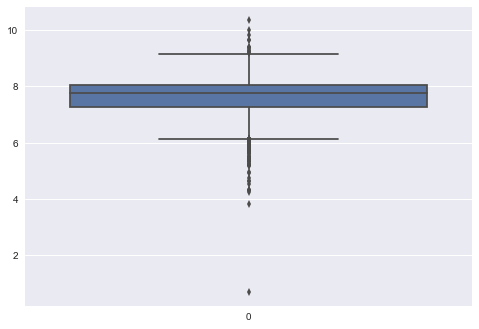

In [83]:
sns.boxplot(data=np.log(df_ac_data.Total_Pamt))

count    7175.000000
mean        7.569049
std         0.618332
min         0.693147
25%         7.274778
50%         7.768453
75%         8.031502
max        10.337232
Name: Total_Pamt, dtype: float64

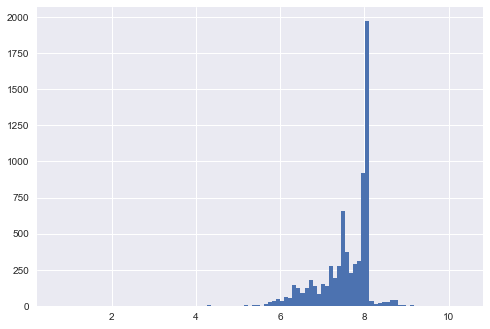

In [86]:
np.log(df_ac_data.Total_Pamt).hist(bins=100)
np.log(df_ac_data.Total_Pamt).describe()

In [87]:
df_ac_data['Total_Pamt']=np.log(df_ac_data['Total_Pamt'])

## Frequency

In [88]:
md_frq_churned=round(df_ac_data[df_ac_data['Churn']==1]['Frequency'].median(),2)
md_frq_churned

63.0

In [89]:
md_frq_nt_churn=round(df_ac_data[df_ac_data['Churn']==0]['Frequency'].median(),2)
md_frq_nt_churn

77.0

In [90]:
df_ac_data.loc[((df_ac_data['Churn']==1) & (df_ac_data['Frequency'].isnull())),'Frequency']=md_frq_churned


In [91]:
df_ac_data.loc[((df_ac_data['Churn']==0) & (df_ac_data['Frequency'].isnull())),'Frequency']=md_frq_nt_churn

---



In [93]:
df_ac_data

,EXRELACTCD,EXTRELSTDT,startyr,Churn,Total_Pamt,Frequency,CLASCODE,CONTDATE,CONTDIREC,CONTID,MEDIUMCODE,MNTOPCODE,Recency
EXTRELNO,,,,,,,,,,,,,
0026419,FP,1992-03-01,1992,0,8.056760,69.0,CT,2006-07-19,O,005057036,CI,CTS,31
0026430,FP,1992-03-01,1992,1,7.932409,146.0,AK,2006-03-16,O,004978998,LE,DIS,472
0026431,FP,1992-03-01,1992,0,8.023097,21.0,CT,2006-10-05,O,005103246,CI,CTS,280
0026443,FP,1992-03-01,1992,0,8.042256,156.0,CT,2006-12-14,O,005150482,CI,CTS,16
0026444,FP,1992-03-01,1992,0,8.036725,157.0,CT,2006-06-21,O,005034575,CI,CTS,16
0026446,FP,1992-03-01,1992,0,8.207276,66.0,CT,2006-08-28,O,005083945,CI,CTS,16
0026447,FP,1992-03-01,1992,0,8.042420,156.0,CT,2006-11-17,O,005130765,CI,CTS,16
0026470,FP,1992-03-01,1992,0,7.989265,156.0,CT,2007-01-10,O,005165099,CI,CTS,16
0026472,FP,1992-03-01,1992,0,8.030618,21.0,CT,2006-06-08,O,005026286,CI,CTS,275


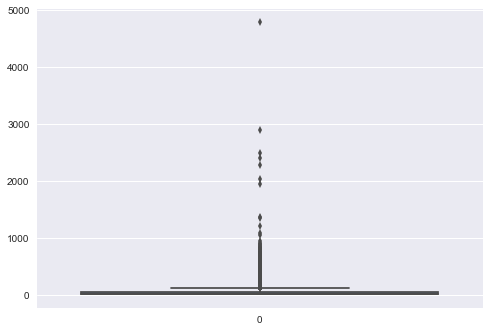

In [104]:
sns.boxplot(data=df_ac_data.Recency)

In [105]:
# Performing Log Transformation to mitigate effect of extreme values in Receny and Frequency Column. As shown inj above boxplot
# we have extreme values.
df_ac_data.Recency=np.log(df_ac_data['Recency'])
df_ac_data.Frequency=np.log(df_ac_data.Frequency)

In [106]:
# Dropping columns which are not relevant for model. 
final=df_ac_data.drop(['EXRELACTCD','EXTRELSTDT','CONTDATE','CONTID'],axis=1)

In [107]:
final

,startyr,Churn,Total_Pamt,Frequency,CLASCODE,CONTDIREC,MEDIUMCODE,MNTOPCODE,Recency
EXTRELNO,,,,,,,,,
0026419,1992,0,8.056760,4.234107,CT,O,CI,CTS,3.433987
0026430,1992,1,7.932409,4.983607,AK,O,LE,DIS,6.156979
0026431,1992,0,8.023097,3.044522,CT,O,CI,CTS,5.634790
0026443,1992,0,8.042256,5.049856,CT,O,CI,CTS,2.772589
0026444,1992,0,8.036725,5.056246,CT,O,CI,CTS,2.772589
0026446,1992,0,8.207276,4.189655,CT,O,CI,CTS,2.772589
0026447,1992,0,8.042420,5.049856,CT,O,CI,CTS,2.772589
0026470,1992,0,7.989265,5.049856,CT,O,CI,CTS,2.772589
0026472,1992,0,8.030618,3.044522,CT,O,CI,CTS,5.616771


In [108]:
final.dtypes

startyr         int64
Churn           int32
Total_Pamt    float64
Frequency     float64
CLASCODE       object
CONTDIREC      object
MEDIUMCODE     object
MNTOPCODE      object
Recency       float64
dtype: object

# Creating dummies for categorical data

In [109]:
final_dumm=pd.get_dummies(final)

In [110]:
final_dumm.shape

(7175, 42)

In [111]:
final_dumm.head()

,startyr,Churn,Total_Pamt,Frequency,Recency,CLASCODE_AK,CLASCODE_AN,CLASCODE_CM,CLASCODE_CT,CLASCODE_ID,...,MNTOPCODE_FIN,MNTOPCODE_IFF,MNTOPCODE_INF,MNTOPCODE_IRE,MNTOPCODE_PRO,MNTOPCODE_REP,MNTOPCODE_TAX,MNTOPCODE_VIS,MNTOPCODE_VOL,MNTOPCODE_WEB
EXTRELNO,,,,,,,,,,,,,,,,,,,,,
0026419,1992,0,8.056760,4.234107,3.433987,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0026430,1992,1,7.932409,4.983607,6.156979,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0026431,1992,0,8.023097,3.044522,5.634790,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0026443,1992,0,8.042256,5.049856,2.772589,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0026444,1992,0,8.036725,5.056246,2.772589,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Seprating Train , Validate & test samples
f_tr=final_dumm[final_dumm['startyr']<2003]
f_vl=final_dumm[final_dumm['startyr']==2004]
f_test=final_dumm[final_dumm['startyr']>2004]

In [113]:
f_tr_target=f_tr['Churn']
f_v1_target=f_vl['Churn']
f_test_target=f_test['Churn']

In [115]:
f_tr.drop(['Churn','startyr'],axis=1,inplace=True)
f_vl.drop(['Churn','startyr'],axis=1,inplace=True)
f_test.drop(['Churn','startyr'],axis=1,inplace=True)

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [116]:
f_tr

,Total_Pamt,Frequency,Recency,CLASCODE_AK,CLASCODE_AN,CLASCODE_CM,CLASCODE_CT,CLASCODE_ID,CLASCODE_RI,CONTDIREC_I,...,MNTOPCODE_FIN,MNTOPCODE_IFF,MNTOPCODE_INF,MNTOPCODE_IRE,MNTOPCODE_PRO,MNTOPCODE_REP,MNTOPCODE_TAX,MNTOPCODE_VIS,MNTOPCODE_VOL,MNTOPCODE_WEB
EXTRELNO,,,,,,,,,,,,,,,,,,,,,
0026419,8.056760,4.234107,3.433987,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0026430,7.932409,4.983607,6.156979,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0026431,8.023097,3.044522,5.634790,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0026443,8.042256,5.049856,2.772589,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0026444,8.036725,5.056246,2.772589,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0026446,8.207276,4.189655,2.772589,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0026447,8.042420,5.049856,2.772589,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0026470,7.989265,5.049856,2.772589,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0026472,8.030618,3.044522,5.616771,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
f_tr_sc=sc.fit_transform(f_tr)
f_tr_sc_df=pd.DataFrame(f_tr_sc,columns=f_tr.columns.tolist())
f_tr_sc_df.head()
f_tr_sc_df['CLASCODE_CM'].isnull().value_counts()

False    5828
Name: CLASCODE_CM, dtype: int64

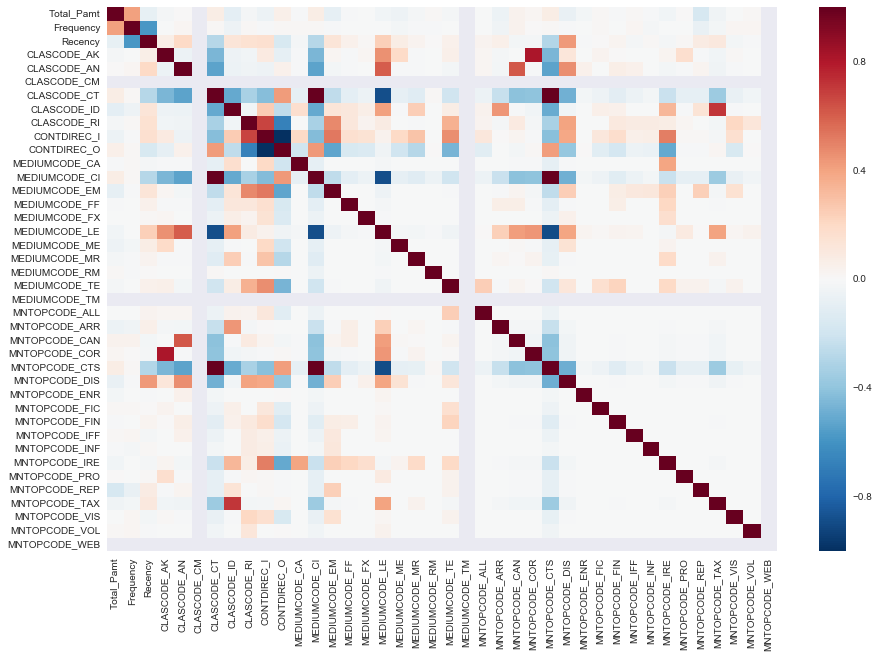

In [119]:
plt.figure(figsize=(15,10))
sns.heatmap(f_tr_sc_df.corr())

In [120]:
# Since there are components which are corelated so we need dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

---
# B. Feature Selection

## Using Select K-Best to find best features.

In [123]:

sk=SelectKBest(k='all')
sk.fit(X=f_tr_sc,y=f_tr_target.values)
i=pd.DataFrame(sk.scores_,index=f_tr.columns.tolist(),columns=['Fscore']).sort_values(by=['Fscore'],ascending=False)
index=i.index[:25].tolist()
print (index)
i


[u'MNTOPCODE_DIS', u'MNTOPCODE_CTS', u'CLASCODE_CT', u'MEDIUMCODE_CI', 'Recency', u'MEDIUMCODE_LE', u'CLASCODE_AN', u'CLASCODE_RI', u'CONTDIREC_I', u'CONTDIREC_O', u'MEDIUMCODE_EM', u'MNTOPCODE_TAX', u'MEDIUMCODE_ME', u'CLASCODE_ID', 'Total_Pamt', u'CLASCODE_AK', u'MEDIUMCODE_TE', u'MEDIUMCODE_FF', u'MNTOPCODE_COR', u'MNTOPCODE_FIN', u'MNTOPCODE_ALL', u'MEDIUMCODE_FX', 'Frequency', u'MEDIUMCODE_MR', u'MNTOPCODE_CAN']


,Fscore
MNTOPCODE_DIS,15506.109375
MNTOPCODE_CTS,2048.758413
CLASCODE_CT,2032.530862
MEDIUMCODE_CI,2016.519564
Recency,1955.533172
MEDIUMCODE_LE,1231.608672
CLASCODE_AN,1125.580969
CLASCODE_RI,905.819445
CONTDIREC_I,886.230248
CONTDIREC_O,886.230248


In [162]:
# we will go ahead with first 25 highest score features
sk_f_tr_sc=f_tr_sc_df[index].values

## Since there is class imbalance here so we need to resample data and counter this imabalance. I am using Synthetic Minority Over-sampling TEchnique (SMOTE) technique  from Imblearn library

In [126]:

from imblearn.over_sampling import SMOTE
from collections import Counter


In [127]:
sm=SMOTE(random_state=3)
x_tr_sk_resample,y_tr_sk_resample=sm.fit_sample(sk_f_tr_sc,f_tr_target.values)

In [128]:
print "Before REsample {}".format(Counter(f_tr_target.values))
print "resample data {}".format(Counter(y_tr_sk_resample))

Before REsample Counter({0: 5455, 1: 373})
resample data Counter({0: 5455, 1: 5455})


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV

--- 
# C. MODEL BUILDING

## 1 - LOGISTIC REGRESSION  
- Doing Grid Search to find best value of C

In [131]:
lr=LogisticRegression(random_state=5)
grid={'C': [.001,.01,.1,1]}

In [132]:
gs=GridSearchCV(estimator=lr,param_grid=grid,cv=5,scoring='recall')
gs.fit(x_tr_sk_resample,y_tr_sk_resample)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=0)

In [135]:
gs.grid_scores_

C:\Users\lenovo\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.94152, std: 0.00551, params: {'C': 0.001},
 mean: 0.94372, std: 0.00561, params: {'C': 0.01},
 mean: 0.95160, std: 0.00612, params: {'C': 0.1},
 mean: 0.95380, std: 0.00685, params: {'C': 1}]

In [136]:
gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Best value for C is 1

---

### Evaluating Model's Performance

In [137]:
round(cross_val_score(estimator=gs.best_estimator_,X=x_tr_sk_resample,y=y_tr_sk_resample,cv=5,scoring='roc_auc').mean(),2)

0.99

In [138]:
confusion_matrix(y_true=y_tr_sk_resample,y_pred=gs.best_estimator_.predict(x_tr_sk_resample))

array([[5387,   68],
       [ 252, 5203]])

In [139]:
print classification_report(y_true=y_tr_sk_resample,y_pred=gs.best_estimator_.predict(x_tr_sk_resample))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5455
          1       0.99      0.95      0.97      5455

avg / total       0.97      0.97      0.97     10910



## Classification report Suggest that our Model is doing well in classifying Both classes

---

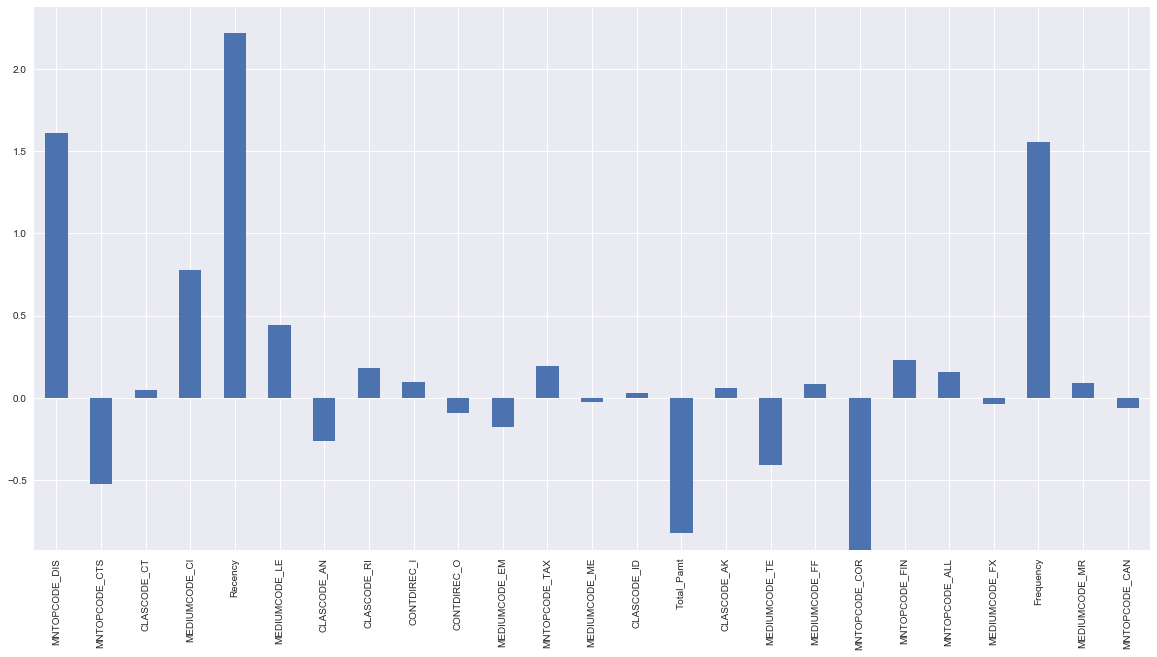

In [140]:
plt.figure(figsize=(20,10))
ax=pd.Series(gs.best_estimator_.coef_.ravel()).plot(kind='bar')
ax.set_xticklabels(index);

### The above plot shows relative effect of predictors on classifying ` CHURN` 
 ***
<big>

-  Reason for contacting organization for Discountibnuation is the most predictive feature & have positive relationship with Churn `MNTOPCODE_DIS`
-  Time since last contact is the second most predictive feature  `Recency`
-  Frequecy oof donating is also have positive impact on prdicting Churn `frequecy`
-  Contacting Organization for FF(face to face) meeting is one important predictor `MNTOPCODE_CORR`
-  Total payment till date is also have good predictive power `Total_Pamt`

# Validating on Validation data

In [141]:
# Resampling data to tacke class imabalance
x_vl_resample,y_vl_resample=sm.fit_sample(f_vl[index],f_v1_target.values)

In [142]:
print "Before REsample {}".format(Counter(f_v1_target.values))
print "resample data {}".format(Counter(y_vl_resample))

Before REsample Counter({0: 481, 1: 39})
resample data Counter({0: 481, 1: 481})


In [143]:
# scaling
x_vl_sc=StandardScaler().fit_transform(x_vl_resample)

In [1151]:
# Model building
#lg=LogisticRegression(C=1)
#lg.fit(x_vl_sc,y_vl_resample)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
round(cross_val_score(estimator=gs.best_estimator_,cv=5,X=x_vl_sc,y=y_vl_resample,scoring='roc_auc').mean(),2)

1.0

In [145]:
print classification_report(y_pred=gs.best_estimator_.predict(x_vl_sc),y_true=y_vl_resample)

             precision    recall  f1-score   support

          0       0.71      1.00      0.83       481
          1       0.99      0.60      0.75       481

avg / total       0.85      0.80      0.79       962



In [146]:
confusion_matrix(y_pred=gs.best_estimator_.predict(x_vl_sc),y_true=y_vl_resample)

array([[479,   2],
       [194, 287]])

# Test Data

In [147]:
#Resampling
x_test_resample,y_test_resample=sm.fit_sample(f_test[index],f_test_target.values)

In [148]:
#Scaling 
x_test_sc=StandardScaler().fit_transform(x_test_resample)

In [149]:
round(cross_val_score(estimator=gs.best_estimator_,cv=5,X=x_test_sc,y=y_test_resample,scoring='roc_auc').mean(),2)

1.0

In [150]:
from sklearn.cross_validation import cross_val_predict
y=cross_val_predict(cv=5,estimator=gs.best_estimator_,X=x_test_sc,y=y_test_resample)

In [151]:
confusion_matrix(y_pred=y,y_true=y_test_resample)

array([[456,  13],
       [ 10, 459]])

In [152]:
print classification_report(y_pred=y,y_true=y_test_resample)

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       469
          1       0.97      0.98      0.98       469

avg / total       0.98      0.98      0.98       938



# With LOgistics Regression:

<big>
- Train Data Score (ROC_AUC)- 98%
- Validation Sample Score - 100%
- Test Sample score- 100%

***


---

# 2nd Model: RANDOM FOREST CLASSIFIER



In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf=RandomForestClassifier(n_estimators=50,max_depth=10,random_state=5)

# On validation data

In [155]:
rf.fit(x_vl_sc,y_vl_resample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=5,
            verbose=0, warm_start=False)

In [156]:
cross_val_score(estimator=rf,cv=5,X=x_vl_sc,y=y_vl_resample,scoring='roc_auc')

array([ 0.99936231,  1.        ,  1.        ,  1.        ,  1.        ])

In [157]:
ypred=cross_val_predict(estimator=rf,cv=5,X=x_vl_sc,y=y_vl_resample)

In [158]:
print " Classification Report \n", classification_report(y_pred=ypred,y_true=y_vl_resample)
print "Confusion Matrix :- \n",confusion_matrix(y_pred=ypred,y_true=y_vl_resample)

 Classification Report 
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       481
          1       0.99      0.99      0.99       481

avg / total       0.99      0.99      0.99       962

Confusion Matrix :- 
[[476   5]
 [  3 478]]


# ON test data

In [159]:
cross_val_score(estimator=rf,cv=5,X=x_test_sc,y=y_test_resample,scoring='roc_auc')

array([ 0.99303984,  1.        ,  1.        ,  0.9983024 ,  1.        ])

In [160]:
print "ON TEST DATA :\n"
ypred_test=cross_val_predict(estimator=rf,cv=5,X=x_test_sc,y=y_test_resample)
print "Classification Report:-  \n ", classification_report(y_pred=ypred_test,y_true=y_test_resample),'\n'
print "Confusion Matrix :- \n",confusion_matrix(y_pred=ypred_test,y_true=y_test_resample)

ON TEST DATA :

Classification Report:-  
               precision    recall  f1-score   support

          0       0.98      0.99      0.98       469
          1       0.99      0.98      0.98       469

avg / total       0.98      0.98      0.98       938


Confusion Matrix :- 
[[463   6]
 [  9 460]]


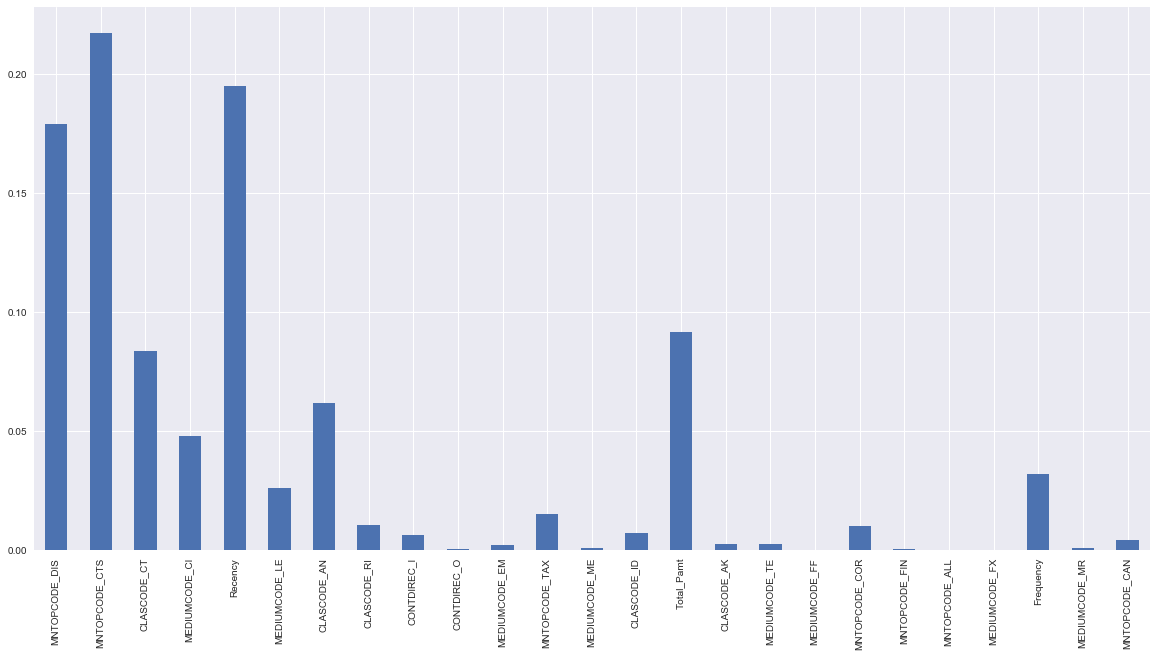

In [161]:
plt.figure(figsize=(20,10))
ax=pd.Series(rf.feature_importances_).plot(kind='bar')
ax.set_xticklabels(index);

# Random Forest classifier is performing better in terms of Classifying `Churn` customers as expressed in Confusion Matrix

---

<big>Confusion Matrix- Random Forest Test Data :- </big>


|   |Cls-0   | Cls-1 |   
|---|---|--- |---|
| Cls 0 |  463   |  6  |
| Cls 1 |  9  |   460 |

  
  ---
  
  
 <big>                                         Confusion Matrix- Logistic Regression Test Data :-



   |  | Cls-0 |  Cls-1  |
|---|---|--- |---|
| Cls- 0 |  456   |  13 |
| Cls- 1 |  16 |   453 |
